In [1]:
import sys 
sys.path.append("..") 

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import PerturbationModel

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

# $\mathbb{B}_3$

In [2]:
n_band = 3
braid_operator_list = [
    BraidOperator(1), BraidOperator(1, True),
    BraidOperator(2), BraidOperator(2, True)
]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

models, braid_operator_list_gen = generator.get_all_combination_generate_sample(n_length=3)
print("The number of braids: ", len(braid_operator_list_gen))
# for operator_list in braid_operator_list_gen[:10]:
#     show_braid_words(operator_list)

The number of braids:  64


In [3]:
#"Different" if similarity_function(model1=models[0],model2=models[1],perturbations=perturbations) == 0 else 'identical'
func = partial(similarity_function, perturbations=perturbations)
cluster = Cluster(similarity_function=func, verbose=False)
center_indices, group_number, groups = cluster.fit(models)

print("Centers: ", center_indices)
print("The number of samples: ", group_number)

Start to cluster data by my own method with the size as [64] with sc = 0.5.
Clustering ... 
A sample with new topological phase detected! [1]
A sample with new topological phase detected! [2]
A sample with new topological phase detected! [3]


/home/longyang/OSC/ml_topological_classification_knot_link/figs/../topology/topology_utils.py:20: RuntimeWarning: divide by zero encountered in log10
  return np.log10(a0)/epsilon
/home/ntu-baile/anaconda3/lib/python3.8/site-packages/scipy/optimize/_optimize.py:811: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/home/longyang/OSC/ml_topological_classification_knot_link/figs/../topology/topology_utils.py:27: RuntimeWarning: divide by zero encountered in log10
  if np.log10(np.abs(v)) < c_val:


A sample with new topological phase detected! [5]
A sample with new topological phase detected! [6]
A sample with new topological phase detected! [7]
A sample with new topological phase detected! [8]
A sample with new topological phase detected! [9]
A sample with new topological phase detected! [10]
A sample with new topological phase detected! [12]
A sample with new topological phase detected! [13]
A sample with new topological phase detected! [15]
A sample with new topological phase detected! [21]
A sample with new topological phase detected! [29]
A sample with new topological phase detected! [31]
A sample with new topological phase detected! [32]
A sample with new topological phase detected! [37]
A sample with new topological phase detected! [40]
A sample with new topological phase detected! [41]
A sample with new topological phase detected! [42]
A sample with new topological phase detected! [48]
A sample with new topological phase detected! [53]
A sample with new topological phase 

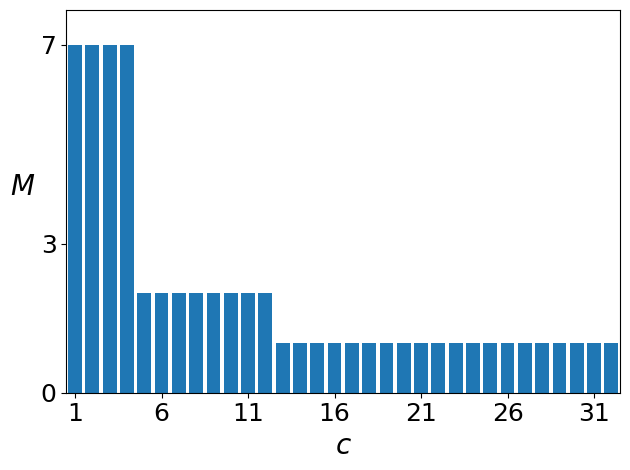

In [6]:
fig = plt.figure()

xticks = list(range(1,len(center_indices)+1, 5))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig('B3.svg')

# Save data

In [7]:
directory_name = 'B3'
with open('./fig2/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))

In [8]:
for i, group in enumerate(groups):
    with open('./fig2/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in [models[index] for index in groups[i]]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

# Extra

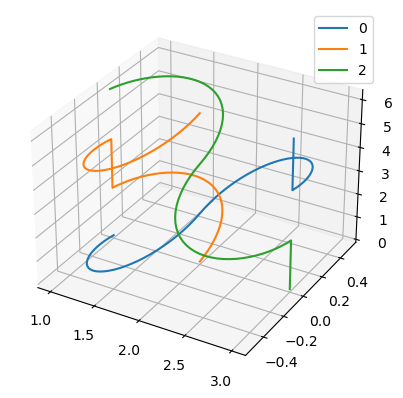

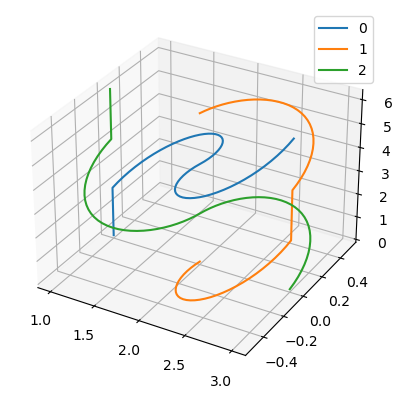

In [11]:
import matplotlib.pyplot as plt


ks = np.linspace(0, 2 * np.pi, 100)

Es = np.array([models[25].get_energies(k) for k in ks])
ax = plt.figure().add_subplot(projection='3d')
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    ax.plot(x, y, ks, label='{0}'.format(index))
    ax.legend()

Es = np.array([models[51].get_energies(k) for k in ks])
ax = plt.figure().add_subplot(projection='3d')
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    ax.plot(x, y, ks, label='{0}'.format(index))
    ax.legend()

plt.show()